# Who is paying and NOT paying the loan?
    - by Jay Ko and Richard Petrie

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

## About dataset
<br/>
<div style="text-align:justify">: This dataset is directly from the website [Lending-Club-Loan-Data](https://www.kaggle.com/wendykan/lending-club-loan-data). According to its description, <u>this dataset contains completed load data for all all loans issued through the 2007-2015, including the current loan status and latest payment information. This data set is a matrix of about 890,000 observations and 75 columns</u><sup>[1]</sup>
[1]:https://www.kaggle.com/wendykan/lending-club-loan-data</div>

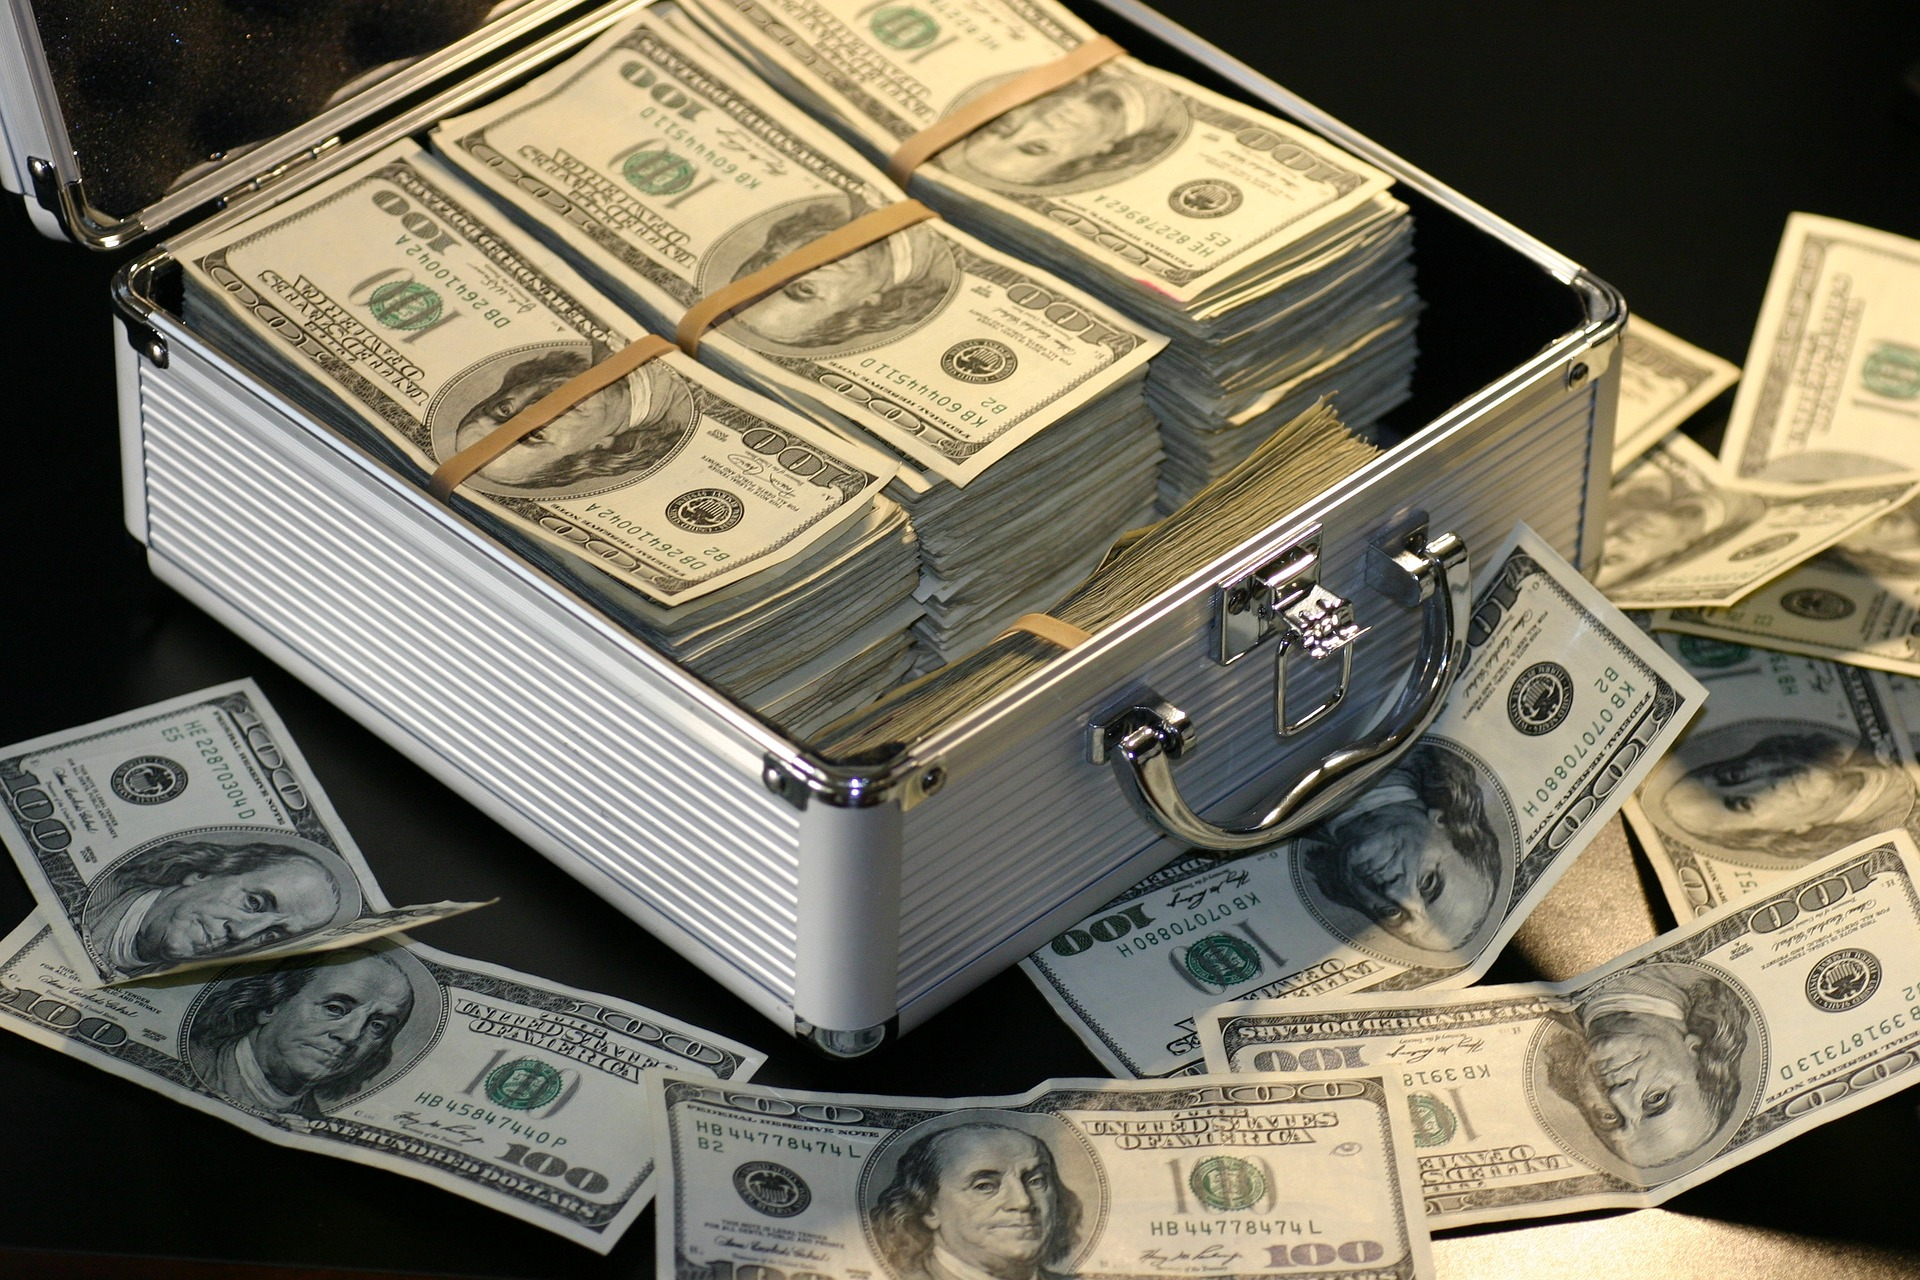

In [1]:
# insert image
from IPython.display import Image
Image("cash.jpg", width=900, height=600)

## Understanding data
<div style="text-align:justify">
<br/>
Not only to the merchandiser, but also to the loaner, getting money back is the most important part for their business. This data set observed almost 900,000 observation with variety factors such as `loan amount`, `funded amount`, `interest rate`, and `total payment` and etc. With this dataset, **we are trying to analysis who is most likely to pay back the loan and who is not**.</div>

## Data processing

In [2]:
# Import basic data science packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
df = pd.read_csv("loan.csv")

/Users/Jay/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Initial drops. I'm fairly confident in not needing these.
df = df.drop(['url', 'desc', 'policy_code', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line', 'emp_title'], axis=1)
df = df.drop(['id', 'title', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'zip_code'], axis=1)

In [5]:
# Booleanize
df['joint_application'] = [0 if x == "INDIVIDUAL" else 1 for x in df['application_type']]
df = df.drop(['application_type'], axis=1)

In [6]:
# Need to drop or categorize object types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 61 columns):
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status                    887379 non-null object
pymnt_plan                     887379 non-null object
purpose             

In [7]:
df.head(1)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,joint_application
0,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
# We may have to drop columns with nulls
df.isnull().any()

member_id                      False
loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
int_rate                       False
installment                    False
grade                          False
sub_grade                      False
emp_length                     False
home_ownership                 False
annual_inc                      True
verification_status            False
issue_d                        False
loan_status                    False
pymnt_plan                     False
purpose                        False
addr_state                     False
dti                            False
delinq_2yrs                     True
inq_last_6mths                  True
mths_since_last_delinq          True
mths_since_last_record          True
open_acc                        True
pub_rec                         True
revol_bal                      False
revol_util                      True
t

In [10]:
# print(df['application_type'].unique())

KeyError: 'application_type'